## Import Libraries

In [1]:
import os
import librosa
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GRU, BatchNormalization, Reshape
from tensorflow.python.keras import utils
from keras.utils import to_categorical
from numpy import load

In [3]:
# load Spectrogam array
X = load('Data/b_mel_specs.npy')

In [4]:
# load Labels array
y = load('Data/b_labels.npy')

#### Train test split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y, test_size=.2)

In [6]:
X_test.shape

(200, 128, 660)

In [7]:
X_train.shape

(799, 128, 660)

#### Reshaping images to be 128 x 660 x 1, where the 1 represents the single color channel

In [8]:
X_train = X_train.reshape(X_train.shape[0], 128, 660, 1)
X_test = X_test.reshape(X_test.shape[0], 128, 660, 1)

#### One hot encoding our labels

In [9]:
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

### Define the Convolutional Recurrent Neural Network Model

In [10]:
frequency_axis = 1
time_axis = 2
channel_axis = 3
# Create sequential model
model = Sequential(name='CRNN')
model.add(Conv2D(64, (3, 3), activation='elu', input_shape=(128, 660, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))# Max pooling
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
model.add(Conv2D(128, (3, 3), activation='elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,4)))
model.add(Dropout(0.1))
resize_shape = model.output_shape[2] * model.output_shape[3]
model.add(Reshape((model.output_shape[1], resize_shape)))
model.add(GRU(64, return_sequences=True))
model.add(GRU(64, return_sequences=False))
model.add(Dense(2, activation='softmax')) 

### Compile the Model

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model Summary

In [12]:
model.summary()

Model: "CRNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 658, 64)      640       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 658, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 329, 64)       0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 329, 64)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 327, 128)      73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 327, 128)      512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 81, 128)       0      

### Train the model

In [13]:
history = model.fit(X_train, y_train, batch_size=20, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
40/40 [==============================] - 7s 182ms/step - loss: 0.4567 - accuracy: 0.7947 - val_loss: 0.7599 - val_accuracy: 0.3700
Epoch 2/25
40/40 [==============================] - 6s 157ms/step - loss: 0.3003 - accuracy: 0.8698 - val_loss: 0.4571 - val_accuracy: 0.7800
Epoch 3/25
40/40 [==============================] - 6s 157ms/step - loss: 0.2736 - accuracy: 0.8861 - val_loss: 0.4498 - val_accuracy: 0.7900
Epoch 4/25
40/40 [==============================] - 6s 156ms/step - loss: 0.3200 - accuracy: 0.8573 - val_loss: 0.4601 - val_accuracy: 0.7900
Epoch 5/25
40/40 [==============================] - 6s 157ms/step - loss: 0.2659 - accuracy: 0.8924 - val_loss: 2.0762 - val_accuracy: 0.4050
Epoch 6/25
40/40 [==============================] - 6s 159ms/step - loss: 0.2300 - accuracy: 0.9061 - val_loss: 0.8192 - val_accuracy: 0.7450
Epoch 7/25
40/40 [==============================] - 6s 156ms/step - loss: 0.2054 - accuracy: 0.9174 - val_loss: 0.3807 - val_accuracy: 0.8400
Epoch 

### Check the Model's train loss and test loss over epochs.

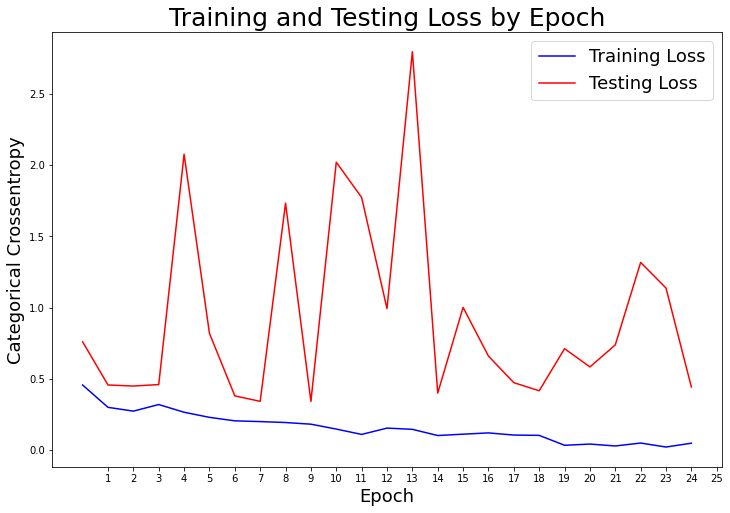

In [14]:
train_loss = history.history['loss']
test_loss = history.history['val_loss']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Loss', color='blue')
plt.plot(test_loss, label='Testing Loss', color='red')

# Set title
plt.title('Training and Testing Loss by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Check the Model's train accuracy and test accuracy over epochs.

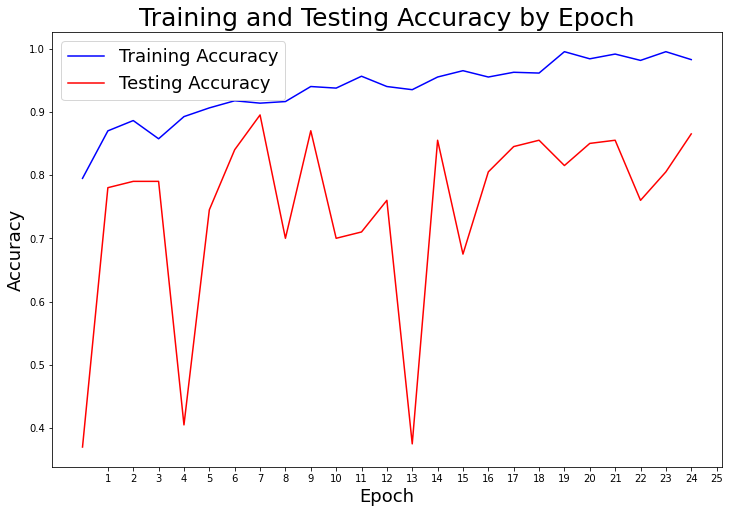

In [15]:
train_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_loss, label='Training Accuracy', color='blue')
plt.plot(test_loss, label='Testing Accuracy', color='red')

# Set title
plt.title('Training and Testing Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Accuracy', fontsize = 18)
plt.xticks(range(1,26), range(1,26))

plt.legend(fontsize = 18);

### Evaluate the model

In [16]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

7/7 - 1s - loss: 0.4428 - accuracy: 0.8650


In [17]:
print(test_acc)

0.8650000095367432


### Making predictions with the CRNN model

In [18]:
predictions = model.predict(X_test, verbose=1)

7/7 [==============================] - 0s 59ms/step


### CRNN Confusion Matrix

In [19]:
conf_matrix = confusion_matrix(np.argmax(y_test, 1), np.argmax(predictions, 1))
conf_matrix

array([[ 49,  11],
       [ 16, 124]])

In [20]:
confusion_df = pd.DataFrame(conf_matrix)
confusion_df

,0,1
0,49,11
1,16,124


#### Matching the Encoded Labels 

In [21]:
labels_dict = {
        0 : 'eclectic',
        1 : 'pop style',
    }

In [22]:
confusion_df = confusion_df.rename(columns=labels_dict, index=labels_dict)

In [23]:
confusion_df

,eclectic,pop style
eclectic,49,11
pop style,16,124


#### Creating a heatmap for the confusion matrix for display

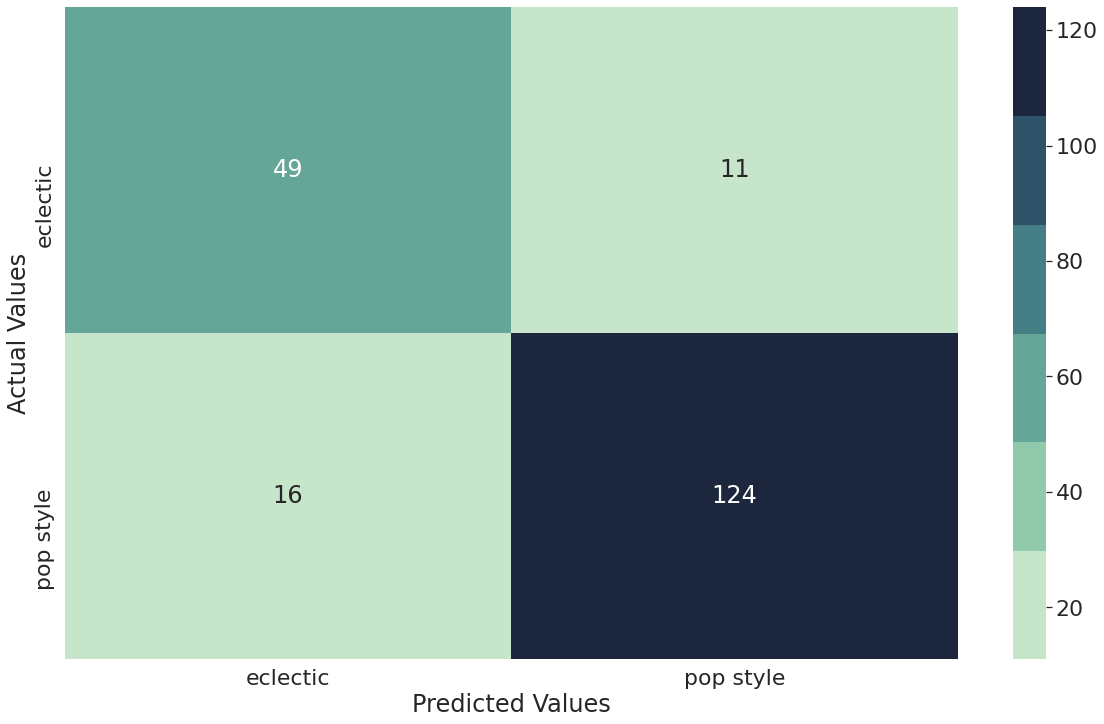

In [24]:
plt.figure(figsize= (20,12))
sns.set(font_scale = 2);
ax = sns.heatmap(confusion_df, fmt="d", annot=True, cmap=sns.cubehelix_palette(rot=-.4));
ax.set(xlabel='Predicted Values', ylabel='Actual Values');

In [25]:
from sklearn.metrics import classification_report

print(classification_report(np.argmax(y_test, 1),  np.argmax(predictions, 1)))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78        60
           1       0.92      0.89      0.90       140

    accuracy                           0.86       200
   macro avg       0.84      0.85      0.84       200
weighted avg       0.87      0.86      0.87       200

